In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv('https://raw.githubusercontent.com/ashokveda/youtube_ai_ml/master/car_evaluation.csv')

In [11]:
df.shape

(1728, 7)

In [12]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [13]:
df.duplicated().sum()

0

In [15]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
buying,1728,4,low,432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maint,1728,4,low,432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doors,1728,NaN,NaN,NaN,3.5,1.11836,2,2.75,3.5,4.25,5
persons,1728,NaN,NaN,NaN,3.66667,1.24758,2,2,4,5,5
lug_boot,1728,3,med,576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
safety,1728,3,low,576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outcome,1728,4,unacc,1210,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.outcome.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: outcome, dtype: int64

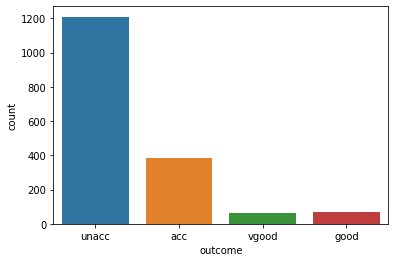

In [18]:
sns.countplot(df['outcome'])

In [19]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
outcome     0
dtype: int64

In [24]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [26]:
X=df.iloc[:,:-1]

In [27]:
y=df['outcome']

In [30]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


## Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encode=LabelEncoder()

In [32]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [42]:
X.loc[:,['buying','maint','lug_boot','safety']]=\
X.loc[:,['buying','maint','lug_boot','safety']].apply(label_encode.fit_transform)

In [43]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,1
1,3,3,2,2,2,2
2,3,3,2,2,2,0
3,3,3,2,2,1,1
4,3,3,2,2,1,2


In [44]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=10)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
log=LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [55]:

model.fit(train_x,train_y)
test_pred=model.predict(test_x)
print("Accuracy Score: ",accuracy_score(test_y,test_pred))
print(confusion_matrix(test_y,test_pred))
print(classification_report(test_y,test_pred))

Accuracy Score:  0.928709055876686
[[ 89   2  11   0]
 [ 10  10   1   0]
 [  5   0 366   0]
 [  5   2   1  17]]
             precision    recall  f1-score   support

        acc       0.82      0.87      0.84       102
       good       0.71      0.48      0.57        21
      unacc       0.97      0.99      0.98       371
      vgood       1.00      0.68      0.81        25

avg / total       0.93      0.93      0.93       519



In [56]:
pd.crosstab(test_y,test_pred)

col_0,acc,good,unacc,vgood
outcome,,,,
acc,89,2,11,0
good,10,10,1,0
unacc,5,0,366,0
vgood,5,2,1,17


## SMOTE

In [59]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [60]:
smote_x,smote_y=smote.fit_sample(train_x.astype('float'),train_y)

In [64]:
from collections import Counter
print("Before smote :",Counter(train_y))
print("After smote :",Counter(smote_y))

Before smote : Counter({'unacc': 839, 'acc': 282, 'good': 48, 'vgood': 40})
After smote : Counter({'acc': 839, 'unacc': 839, 'vgood': 839, 'good': 839})


In [65]:
smote_x

array([[0.        , 0.        , 3.        , 5.        , 0.        ,
        0.        ],
       [1.        , 3.        , 2.        , 5.        , 1.        ,
        1.        ],
       [2.        , 3.        , 4.        , 5.        , 2.        ,
        1.        ],
       ...,
       [1.        , 1.        , 4.        , 4.54285409, 0.45714591,
        2.        ],
       [2.        , 1.        , 3.        , 4.        , 1.9639135 ,
        0.        ],
       [1.        , 2.        , 5.        , 4.8663296 , 1.        ,
        2.        ]])

In [66]:
model.fit(smote_x,smote_y)
test_pred=model.predict(test_x)
print("Accuracy Score: ",accuracy_score(test_y,test_pred))
print(confusion_matrix(test_y,test_pred))
print(classification_report(test_y,test_pred))

Accuracy Score:  0.9364161849710982
[[ 86   9   5   2]
 [  0  21   0   0]
 [ 13   1 356   1]
 [  1   1   0  23]]
             precision    recall  f1-score   support

        acc       0.86      0.84      0.85       102
       good       0.66      1.00      0.79        21
      unacc       0.99      0.96      0.97       371
      vgood       0.88      0.92      0.90        25

avg / total       0.94      0.94      0.94       519



In [67]:
pd.crosstab(test_y,test_pred)

col_0,acc,good,unacc,vgood
outcome,,,,
acc,86,9,5,2
good,0,21,0,0
unacc,13,1,356,1
vgood,1,1,0,23


In [68]:
from pandas_profiling import ProfileReport

In [72]:
profile=ProfileReport(df,html={'style' :{'full_width':True}})

TypeError: _plot_histogram() got an unexpected keyword argument 'html'

In [70]:
profile

Number of variables,7
Number of observations,1728
Total Missing (%),0.0%
Total size in memory,94.6 KiB
Average record size in memory,56.0 B
Numeric,2
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,0
